In [2]:
from google.colab import drive
import os


drive.mount('/content/gdrive')
os.chdir('/content/gdrive/MyDrive/BT5153')
print("Current directory:", os.getcwd())

Mounted at /content/gdrive
Current directory: /content/gdrive/.shortcut-targets-by-id/1-EuPWwH26BHpNG41utRuC3Oo7qwXYRcD/BT5153


In [ ]:
dog_label_folder_raw = '/content/gdrive/MyDrive/BT5153/dog label/Raw/Angry'

for folder_name in os.listdir(dog_label_folder_raw):
    folder_path = os.path.join(dog_label_folder_raw, folder_name)
    if os.path.isdir(folder_path):
        image_count = len([file for file in os.listdir(folder_path)
                   if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))])
        print(f"Folder '{folder_name}' contains {image_count} images.")

Folder 'angry1865' contains 1865 images.
Folder 'angry1000' contains 1010 images.


In [ ]:
dog_label_folder_raw = '/content/gdrive/MyDrive/BT5153/dog label/Raw/Sad'

for folder_name in os.listdir(dog_label_folder_raw):
    folder_path = os.path.join(dog_label_folder_raw, folder_name)
    if os.path.isdir(folder_path):
        image_count = len([file for file in os.listdir(folder_path)
                   if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))])
        print(f"Folder '{folder_name}' contains {image_count} images.")

Folder 'sad1000' contains 1000 images.


In [ ]:
dog_label_folder_raw = '/content/gdrive/MyDrive/BT5153/dog label/Raw/Happy'

for folder_name in os.listdir(dog_label_folder_raw):
    folder_path = os.path.join(dog_label_folder_raw, folder_name)
    if os.path.isdir(folder_path):
        image_count = len([file for file in os.listdir(folder_path)
                   if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))])
        print(f"Folder '{folder_name}' contains {image_count} images.")

Folder 'happy1000' contains 1000 images.
Folder 'happy1865' contains 1875 images.


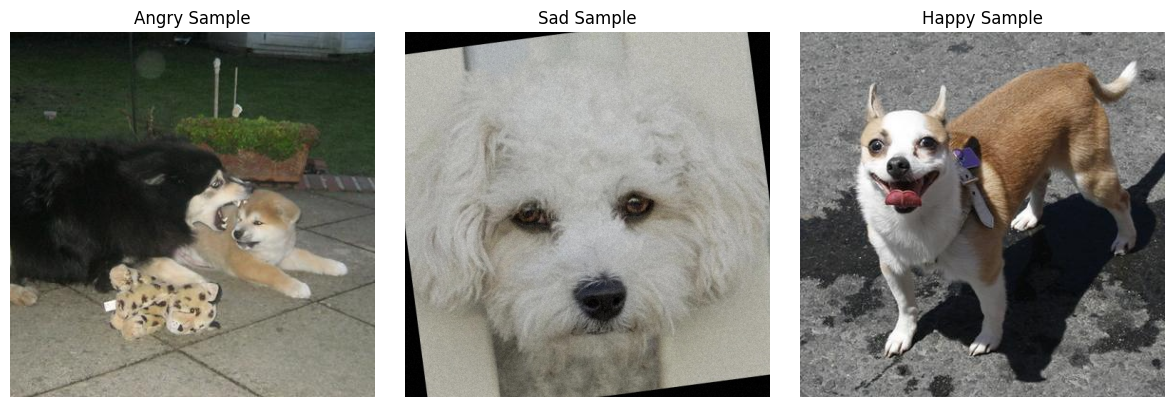

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Define folders
emotion_folders = {
    'angry': '/content/gdrive/MyDrive/BT5153/dog label/Raw/Angry/angry1865',
    'sad': '/content/gdrive/MyDrive/BT5153/dog label/Raw/Sad/sad1000',
    'happy': '/content/gdrive/MyDrive/BT5153/dog label/Raw/Happy/happy1865'
}

# Plot one image from each folder
plt.figure(figsize=(12, 4))
for i, (emotion, folder_path) in enumerate(emotion_folders.items()):
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            image_path = os.path.join(folder_path, filename)
            img = Image.open(image_path)
            plt.subplot(1, 3, i + 1)
            plt.imshow(img)
            plt.axis('off')
            plt.title(f'{emotion.capitalize()} Sample')
            break

plt.tight_layout()
plt.show()

In [ ]:
import os
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train_dir = os.path.join(os.getcwd(), 'dog label/clean/train')

filepaths = [os.path.join(train_dir, f) for f in os.listdir(train_dir) if f.endswith(('.jpg', '.png', '.jpeg'))]
labels = [os.path.basename(f).split('_')[0] for f in filepaths]

df = pd.DataFrame({
    'filepath': filepaths,
    'label': labels
})

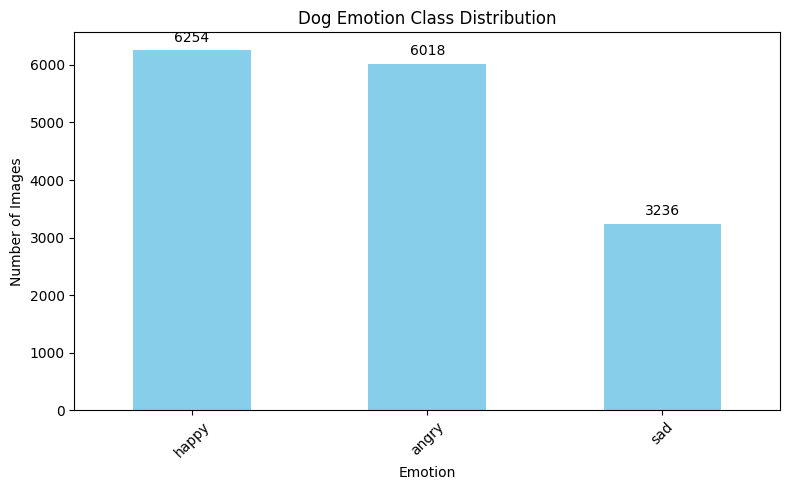

In [ ]:
label_counts = df['label'].value_counts()

plt.figure(figsize=(8, 5))
ax = label_counts.plot(kind='bar', color='skyblue')

for i, count in enumerate(label_counts):
    ax.text(i, count + 100, str(count), ha='center', va='bottom', fontsize=10)

plt.title('Dog Emotion Class Distribution')
plt.xlabel('Emotion')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
from tqdm import tqdm
from joblib import Parallel, delayed
import multiprocessing
from PIL import Image
import numpy as np

def compute_brightness_fast(image_path):
    try:
        with Image.open(image_path).convert('L') as img:
            return np.array(img).mean()
    except:
        return np.nan

n_jobs = multiprocessing.cpu_count()  # use all cores
df['brightness'] = Parallel(n_jobs=n_jobs)(
    delayed(compute_brightness_fast)(path) for path in df['filepath']
)

  2%|▏         | 259/15508 [09:23<9:13:25,  2.18s/it]
<ipython-input-13-e0878590f13a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='label', y='brightness', palette='Set2')


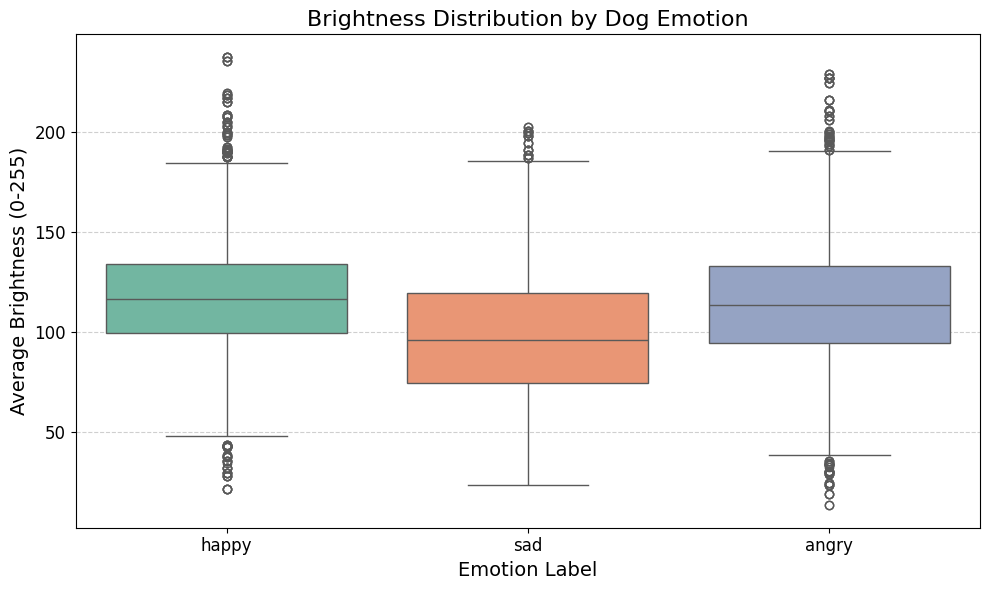

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='label', y='brightness', palette='Set2')

plt.title('Brightness Distribution by Dog Emotion', fontsize=16)
plt.xlabel('Emotion Label', fontsize=14)
plt.ylabel('Average Brightness (0-255)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

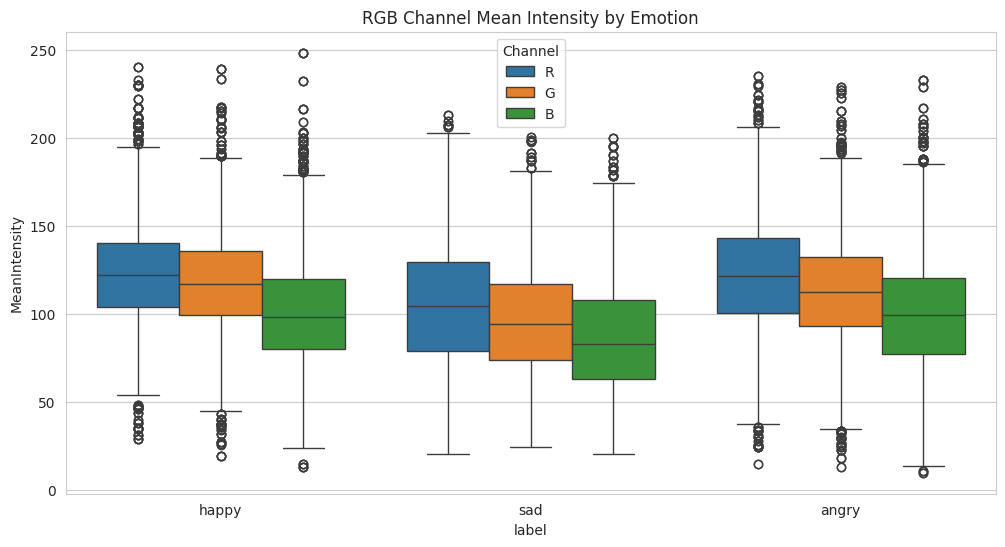

In [ ]:
import cv2

def get_rgb_means(path):
    img = cv2.imread(path)
    if img is None: return [np.nan, np.nan, np.nan]
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    r, g, b = img[:,:,0].mean(), img[:,:,1].mean(), img[:,:,2].mean()
    return [r, g, b]

df[['R', 'G', 'B']] = pd.DataFrame([get_rgb_means(p) for p in df['filepath']])

# Plot
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
df_melt = df.melt(id_vars='label', value_vars=['R', 'G', 'B'], var_name='Channel', value_name='MeanIntensity')
sns.boxplot(x='label', y='MeanIntensity', hue='Channel', data=df_melt)
plt.title('RGB Channel Mean Intensity by Emotion')
plt.show()

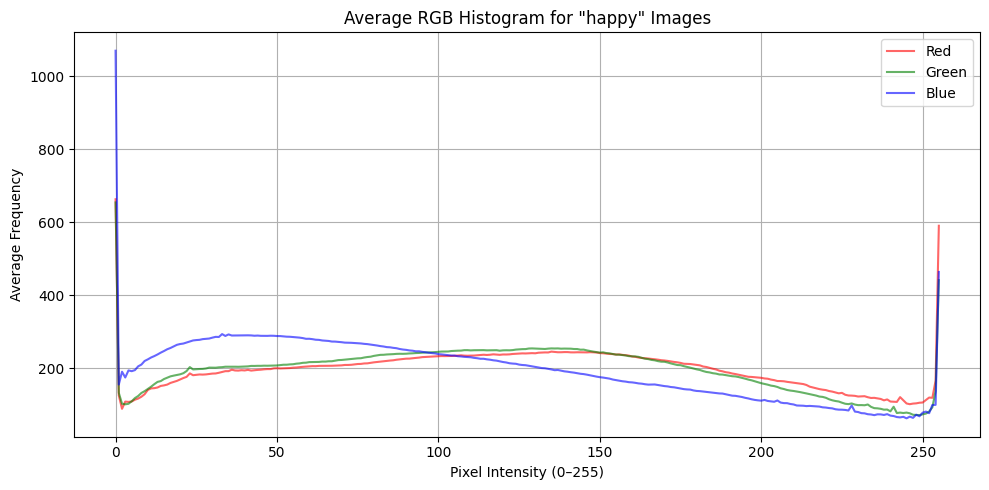

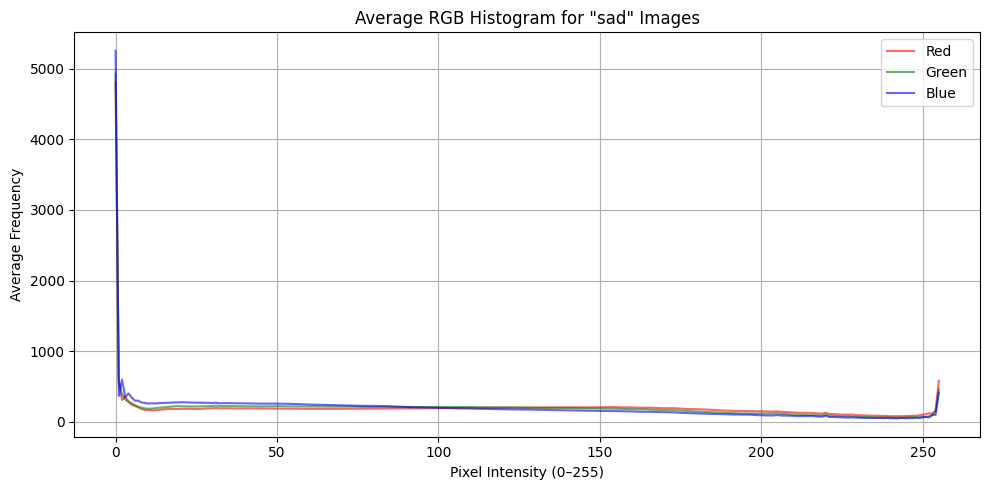

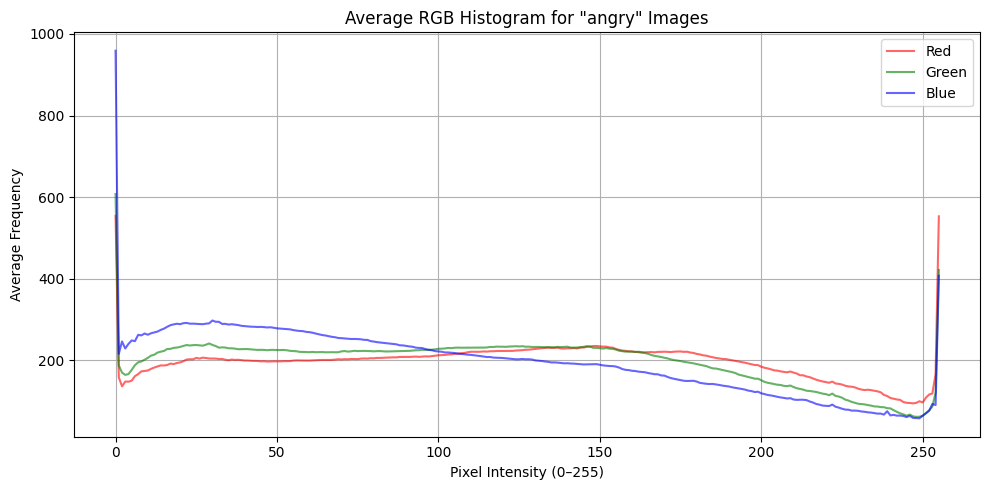

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def compute_average_histogram(image_paths):
    r_total = np.zeros(256)
    g_total = np.zeros(256)
    b_total = np.zeros(256)
    count = 0

    for path in image_paths:
        try:
            img = Image.open(path).convert('RGB')
            r, g, b = img.split()
            r_hist = np.histogram(np.array(r).flatten(), bins=256, range=(0, 255))[0]
            g_hist = np.histogram(np.array(g).flatten(), bins=256, range=(0, 255))[0]
            b_hist = np.histogram(np.array(b).flatten(), bins=256, range=(0, 255))[0]

            r_total += r_hist
            g_total += g_hist
            b_total += b_hist
            count += 1
        except:
            continue

    # Normalize by number of images
    return r_total / count, g_total / count, b_total / count

# Loop over each label and compute average histogram
labels = df['label'].unique()
for label in labels:
    paths = df[df['label'] == label]['filepath']
    r_avg, g_avg, b_avg = compute_average_histogram(paths)

    plt.figure(figsize=(10, 5))
    plt.plot(r_avg, color='red', label='Red', alpha=0.6)
    plt.plot(g_avg, color='green', label='Green', alpha=0.6)
    plt.plot(b_avg, color='blue', label='Blue', alpha=0.6)
    plt.title(f'Average RGB Histogram for "{label}" Images')
    plt.xlabel("Pixel Intensity (0–255)")
    plt.ylabel("Average Frequency")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

100%|██████████| 15508/15508 [00:51<00:00, 300.23it/s]


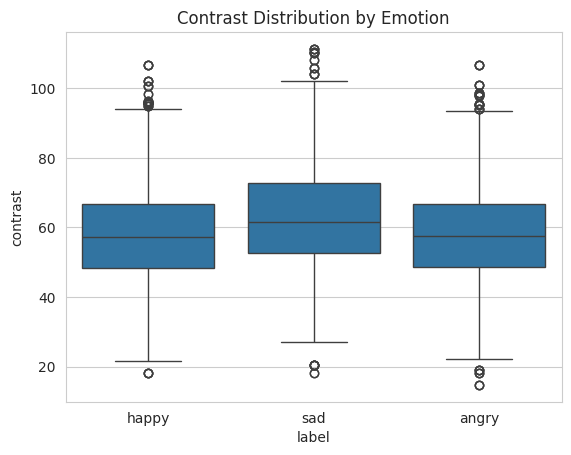

In [ ]:
def compute_contrast(image_path):
    try:
        img = Image.open(image_path).convert('L')
        arr = np.array(img)
        return arr.std()
    except:
        return np.nan

df['contrast'] = [compute_contrast(p) for p in tqdm(df['filepath'])]
sns.boxplot(data=df, x='label', y='contrast')
plt.title('Contrast Distribution by Emotion')
plt.show()

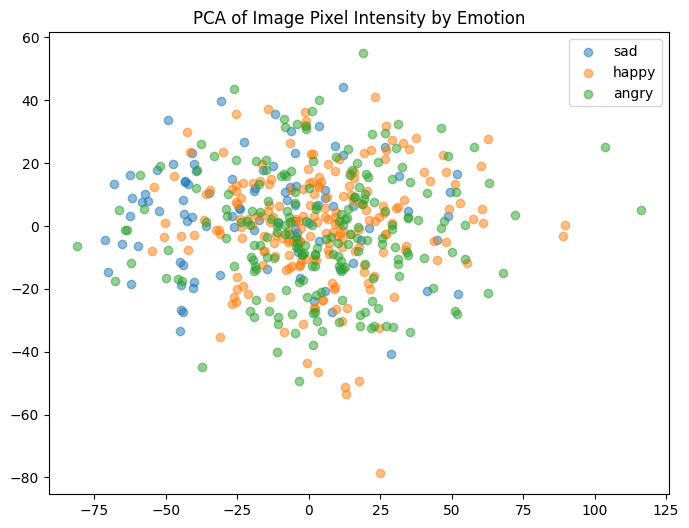

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

sample_df = df.sample(500, random_state=42)
pixels = [np.array(Image.open(p).convert('L').resize((64,64))).flatten() for p in sample_df['filepath']]
X = StandardScaler().fit_transform(pixels)
pca = PCA(n_components=2).fit_transform(X)

plt.figure(figsize=(8,6))
for label in sample_df['label'].unique():
    idx = sample_df['label'] == label
    plt.scatter(pca[idx, 0], pca[idx, 1], label=label, alpha=0.5)
plt.legend()
plt.title("PCA of Image Pixel Intensity by Emotion")
plt.show()

In [ ]:
from PIL import Image
import numpy as np
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm

# Convert all images to 64x64 grayscale and flatten
X = [np.array(Image.open(p).convert('L').resize((64, 64))).flatten() for p in tqdm(df['filepath'])]
X = np.array(X)

# Standardize the pixel intensities
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


100%|██████████| 15508/15508 [00:51<00:00, 303.49it/s]


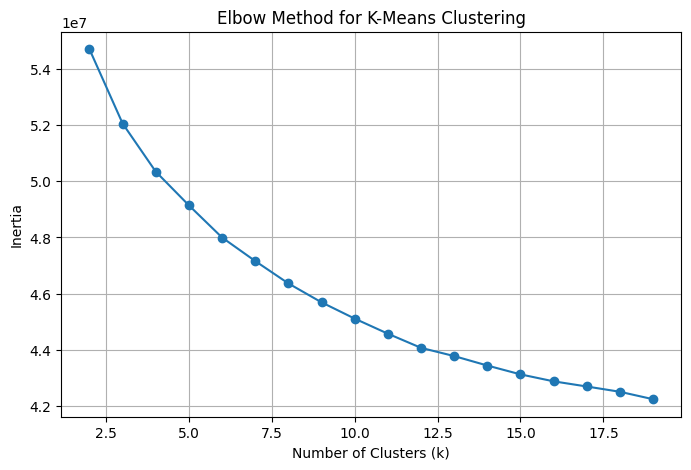

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertias = []
k_range = range(2, 20)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42, n_init='auto')
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.figure(figsize=(8,5))
plt.plot(k_range, inertias, marker='o')
plt.title("Elbow Method for K-Means Clustering")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

In [ ]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
clusters = kmeans.fit_predict(X_scaled)
df['cluster'] = clusters

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df['pca1'] = X_pca[:, 0]
df['pca2'] = X_pca[:, 1]

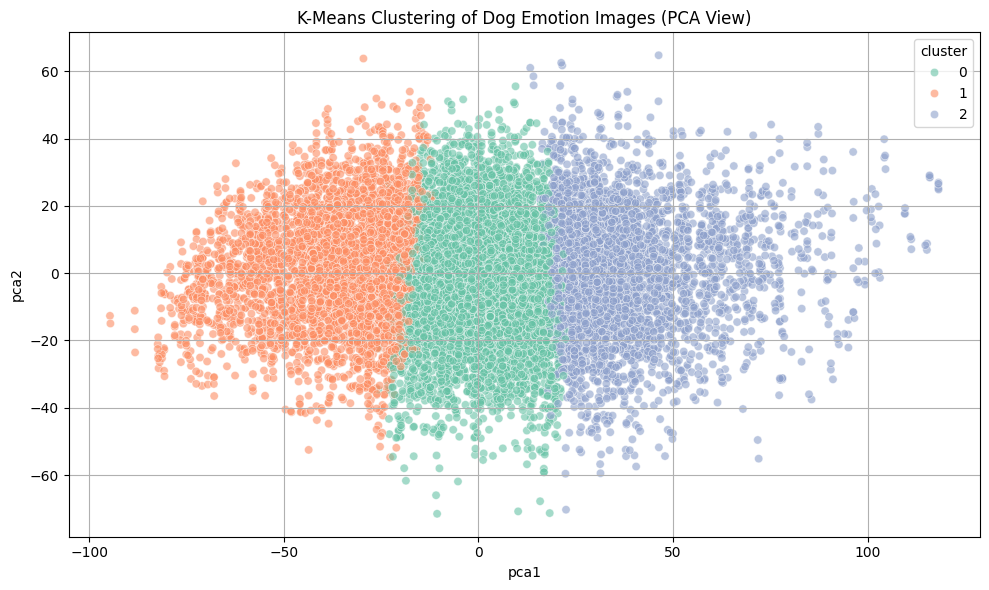

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='pca1', y='pca2', hue='cluster', palette='Set2', alpha=0.6)
plt.title('K-Means Clustering of Dog Emotion Images (PCA View)')
plt.grid(True)
plt.tight_layout()
plt.show()

**CNN**



In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score


target_ratio = (224, 224)  # Or whatever resolution you're using
train_dir = '/content/gdrive/MyDrive/BT5153/dog label/clean/train'
test_dir = '/content/gdrive/MyDrive/BT5153/dog label/clean/test'

def load_images_from_folder(folder):
    images = []
    labels = []
    for filename in os.listdir(folder):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            img = load_img(os.path.join(folder, filename), target_size=target_ratio)
            img_array = img_to_array(img)
            images.append(img_array)

            label = filename.split('_')[0]  # Extract label from filename
            labels.append(label)

    return np.array(images), np.array(labels)

train_images, train_labels = load_images_from_folder(train_dir)
test_images, test_labels = load_images_from_folder(test_dir)

# Normalize pixel values
train_images = train_images / 255.0
test_images = test_images / 255.0

# Convert labels to categorical
label_map = {label: i for i, label in enumerate(np.unique(train_labels))}
print("Label Map (class index → label):")
for label, idx in label_map.items():
    print(f"{idx} → {label}")
train_labels = to_categorical([label_map[label] for label in train_labels])
test_labels = to_categorical([label_map[label] for label in test_labels])

cnn_checkpoint_path = '/content/best_cnn_model.h5'
cnn_checkpoint_cb = ModelCheckpoint(
    cnn_checkpoint_path,
    save_best_only=True,
    monitor='val_accuracy',
    mode='max',
    verbose=1
)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(target_ratio[0], target_ratio[1], 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(len(label_map), activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

epochs = 10

# Split train + val
X_train, X_val, y_train, y_val = train_test_split(
    train_images, train_labels,
    test_size=0.2, stratify=np.argmax(train_labels, axis=1), random_state=42
)


history = model.fit(X_train, y_train,
                    epochs=epochs,
                    validation_data=(X_val, y_val),
                    callbacks=[cnn_checkpoint_cb]
                    )

# history = model.fit(train_images, train_labels,
#                     epochs=epochs,
#                     validation_data=(test_images, test_labels))

# test_loss, test_acc = model.evaluate(test_images, test_labels)
# print(f'Test accuracy: {test_acc:.3f}')

y_true = np.argmax(test_labels, axis=1)
y_pred_probs = model.predict(test_images)
y_pred = np.argmax(model.predict(test_images), axis=1)
id_to_label = {v: k for k, v in label_map.items()}

print("\n📊 Classification Report (including Recall, Precision, F1-score):\n")
print(classification_report(y_true, y_pred, target_names=[id_to_label[i] for i in range(len(label_map))]))

try:
    auc_macro = roc_auc_score(test_labels, y_pred_probs, multi_class='ovr', average='macro')
    auc_weighted = roc_auc_score(test_labels, y_pred_probs, multi_class='ovr', average='weighted')
    print(f"\n Macro-averaged ROC AUC: {auc_macro:.3f}")
    print(f" Weighted-averaged ROC AUC: {auc_weighted:.3f}")
except Exception as e:
    print(f"\n ROC AUC Error: {e}")
